### Secretary / marriage problem.

##### You are permitted to inspect the $N$ prizes at a fête in a given order, at each stage either rejecting or accepting the prize under consideration. There is no recall, in the sense that no rejected prize may be accepted later. It may be assumed that, given complete information, the prizes may be ranked in a strict order of preference, and that the order of presentation is independent of this ranking. Find the strategy which maximizes the probability of accepting the best prize, and describe its behaviour when n is large.

In [246]:
import math
import numpy as np
import matplotlib.pyplot as plt

Best prize at draw number 47


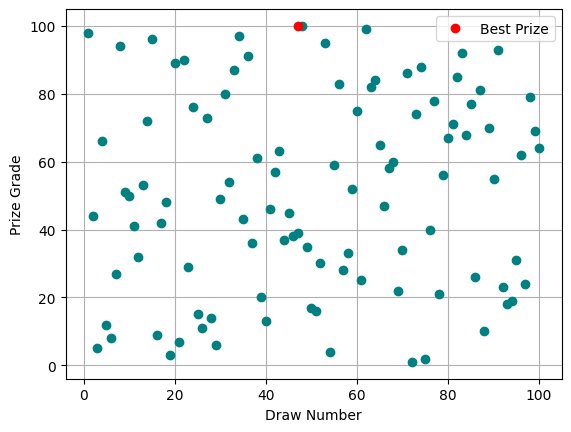

In [247]:
# assume n prizes with distinct grades from 1 to n_prizes
n_prizes = 100
prize_grades = np.arange(1, n_prizes+1)
# randomize position of prize grades and plot
np.random.shuffle(prize_grades)
plt.plot(np.arange(1,n_prizes+1), prize_grades,'o', color='teal')
max_index = np.argmax(prize_grades)
print('Best prize at draw number',max_index)
plt.plot(max_index, prize_grades[max_index], 'o', color='red', label='Best Prize')
plt.xlabel('Draw Number')
plt.ylabel('Prize Grade')
plt.grid()
plt.legend()

 ##### At draw $j$, I can take the prize or reject it and continue drawing. The chance that I select the best prize at draw $j$ (select mean return) is $p=j/N$ (because I will not take a prize worse than previous ones). The mean return in case I reject the prize and continue drawing is $\bar r(j)$. Note that $j/N$ increases with $j$, while $\bar r(j)$ decreases with $j$. If I keep rejecting prizes, the chances of rejecting the best also increase. What is $j$ maximizing the probability to take the best prize? That's the $j$ where the select mean return becomes larger than the reject mean return: from then on, it's best to select rather than reject.


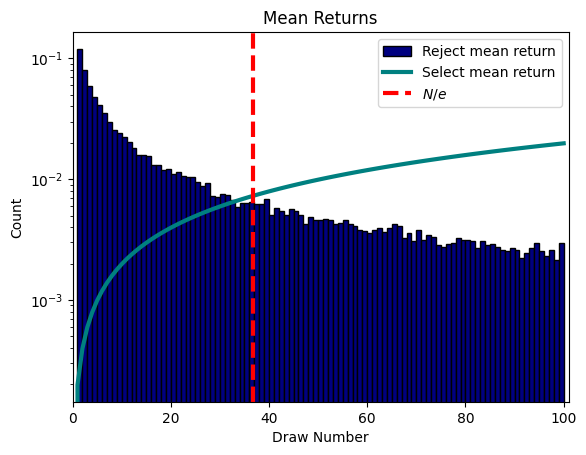

In [248]:
# let's compute the reject mean return
n_simulations = 10000
max_grades = np.zeros((n_simulations, n_prizes), dtype=int)
for i in range(n_simulations):
    np.random.shuffle(prize_grades)
    # for each simulation, go through the draws, and update max_grade if it is the highest grade so far
    max_grade = 0
    for j in range(n_prizes):
        if prize_grades[j] > max_grade:
            max_grades[i,j] = prize_grades[j]
            max_grade = prize_grades[j]
        else:
            max_grades[i,j] = max_grade

# it is only when the max grade changes that I might want to take the prize and stop drawing:
# for each simulation, go through the list of prizes and determine when the max changes

take_boolean = np.full((n_simulations, n_prizes), False, dtype=bool)  

for i in range(n_simulations):
    #take_boolean[i,0] = True # the first prize cannot be compared with any other, so it's set to False
    for j in range(1,n_prizes):
        if max_grades[i,j] > max_grades[i,j-1]:
            take_boolean[i,j] = True

# Now plot the distribution of the indices where the max grade changes
true_indices = []
for i in range(n_simulations):
    true_indices.extend(np.where(take_boolean[i])[0])
    #print(max_grades[i,:])
    #print(np.where(take_boolean[i])[0])

plt.hist([i for i in true_indices], bins=n_prizes, range=(1,n_prizes+1),color='navy', edgecolor='black',density=True,label='Reject mean return')
plt.plot(np.arange(0,n_prizes+1),np.arange(0,n_prizes+1)/np.sum(np.arange(0,n_prizes+1)), color='teal', linewidth=3, label='Select mean return')
plt.axvline(n_prizes/math.e, color='red', linestyle='--', linewidth=3, label=r'$N/e$')
plt.xlabel('Draw Number')
plt.ylabel('Count')
plt.title('Mean Returns')
plt.xlim(0,n_prizes+1)
plt.yscale('log')
plt.legend()
plt.show()

##### The draw number maximizing the probability of selecting the best prize is $N/e$. This can be demonstrated analytically. In particular, when N is large enough, the maximum of the probability of achieving the best prize, $h(x) = (x/N)\cdot\log(N/x)$, lies at $x = N/e$. 